In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("agaricus-lepiota.data", names = ["poisonous","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"] ,header= None)
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


I've copied and downloaded the dataset from the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/73/mushroom

Here's the data dictionary:
 
 1. cap-shape:bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
 2. cap-surface:fibrous=f,grooves=g,scaly=y,smooth=s
 3. cap-color:brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
 4. bruises?:bruises=t,no=f
 5. odor:almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
 6. gill-attachment:attached=a,descending=d,free=f,notched=n
 7. gill-spacing:close=c,crowded=w,distant=d
 8. gill-size:broad=b,narrow=n
 9. gill-color:black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
 10. stalk-shape:enlarging=e,tapering=t
 11. stalk-root:bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
 12. stalk-surface-above-ring:fibrous=f,scaly=y,silky=k,smooth=s
 13. stalk-surface-below-ring:fibrous=f,scaly=y,silky=k,smooth=s
 14. stalk-color-above-ring:brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
 15. stalk-color-below-ring:brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
 16. veil-type:partial=p,universal=u
 17. veil-color:brown=n,orange=o,white=w,yellow=y
 18. ring-number:none=n,one=o,two=t
 19. ring-type:cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
 20. spore-print-color:black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
 21. population:abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
 22. habitat:grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=dn=u,waste=w,woods=d



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Something slightly uncommon about this dataset is that the target variable is the first variable

We need to set up some data to get ready to graph. I want to graph the different odors first and the counts of how many of each odor are poisonous and edible. I'll need to extract some of that data from the dataframe to do this.

In [4]:
import matplotlib.pyplot as plt

odor_x = df.odor.unique()
print(odor_x)
odor_titles = ["Spicy", "Almond", "Anise","None","Foul","Creosote","Fishy","Spicy","Musty"]

X_axis = np.arange(len(odor_x))

values_p = {}
for i in odor_x:
    values_p[i+"_poisonous"] = 0

values_e = {}
for i in odor_x:
    values_e[i+"_edible"] = 0
    

for i in odor_x:
    temp_df = df.loc[(df["odor"] == i)]
    try:
        vc_temp_df_p = temp_df["poisonous"].value_counts()
        values_p[i+"_poisonous"] = vc_temp_df_p["p"]
    except:
        pass
    try:
        vc_temp_df_e = temp_df["poisonous"].value_counts()
        values_e[i+"_edible"] = vc_temp_df_e["e"]
    except:
        pass

print(values_e)

['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
{'p_edible': 0, 'a_edible': 400, 'l_edible': 400, 'n_edible': 3408, 'f_edible': 0, 'c_edible': 0, 'y_edible': 0, 's_edible': 0, 'm_edible': 0}


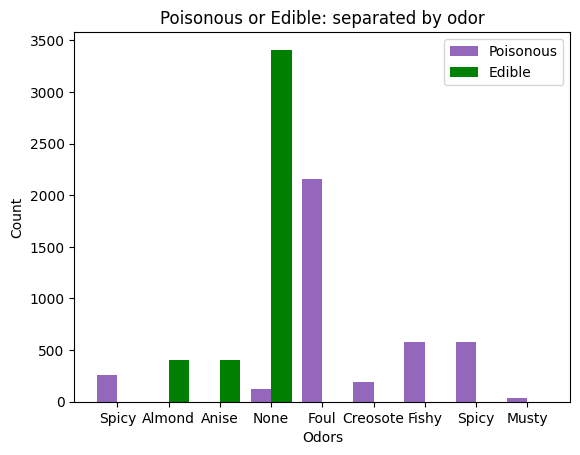

In [5]:
plt.bar(X_axis -.2, values_p.values(), 0.4, label = "Poisonous", color='tab:purple')
plt.bar(X_axis +.2, values_e.values(), 0.4, label = "Edible", color='g')

plt.xticks(X_axis, odor_titles)
plt.xlabel("Odors")
plt.ylabel("Count")
plt.title("Poisonous or Edible: separated by odor")
plt.legend()
plt.savefig(fname="Poisonous or Edible")
plt.show()

Graph looks perfect

In [6]:
X = df.drop("poisonous", axis=1)
y= df['poisonous']

In [7]:
y = y.map({'p':1,'e':0})
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: poisonous, Length: 8124, dtype: int64

Here we want to map our target column to either 0 or 1 based on its value

In [8]:
from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test = tts(X,y, test_size=0.2, random_state = 42)

In [9]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,k,s,e,f,s,f,c,n,b,t,...,k,p,w,p,w,o,e,w,v,d
6515,x,s,n,f,f,f,c,n,b,t,...,s,w,w,p,w,o,e,w,v,p
6141,f,y,e,f,y,f,c,n,b,t,...,s,p,w,p,w,o,e,w,v,l
2764,f,f,n,t,n,f,c,b,u,t,...,s,g,p,p,w,o,p,n,v,d
438,b,y,y,t,l,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,x,y,n,f,f,f,c,n,b,t,...,s,p,w,p,w,o,e,w,v,p
5390,k,y,e,t,n,f,c,b,w,e,...,s,w,e,p,w,t,e,w,c,w
860,f,y,n,t,l,f,c,b,w,e,...,y,w,w,p,w,o,p,n,y,p
7603,k,s,e,f,f,f,c,n,b,t,...,s,p,p,p,w,o,e,w,v,p


Now let's see what our optimal k-value might be for some clustering. Unfortunately, sci-kit learn loves to have numeric data rather than string values so we will just have to One Hot Encode the above data. Fun fun!

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False).set_output(transform='pandas')

enc_df = ohe.fit_transform(X)
enc_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Okay, that looks good. Now let's remake our training and test sets using the encoded data

In [11]:
X_train = ohe.fit_transform(X_train)
X_test = ohe.fit_transform(X_test)

In [12]:
from sklearn.cluster import KMeans

k_values = list(range(2,20))
inertias = []

for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(enc_df)
    inertias.append(km.inertia_)

Text(0, 0.5, 'WCSS')

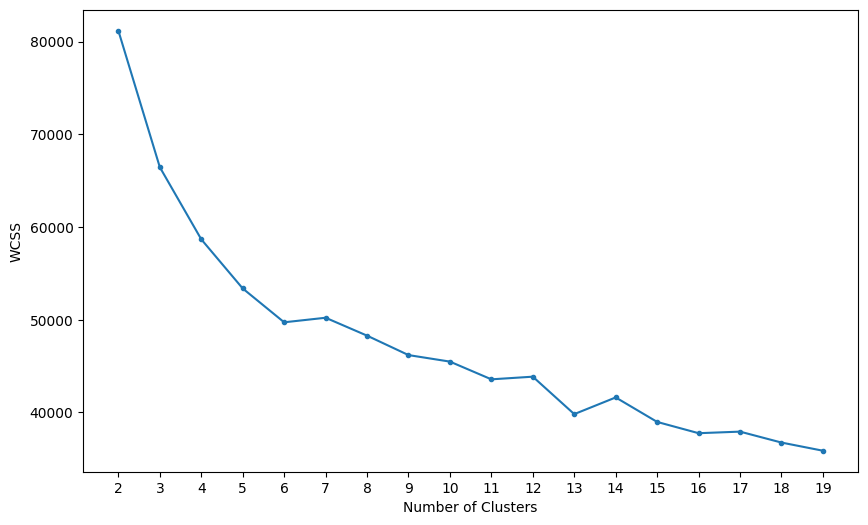

In [13]:
plt.figure(figsize=(10,6))
plt.plot(k_values, inertias, marker=".")
plt.xticks(k_values)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

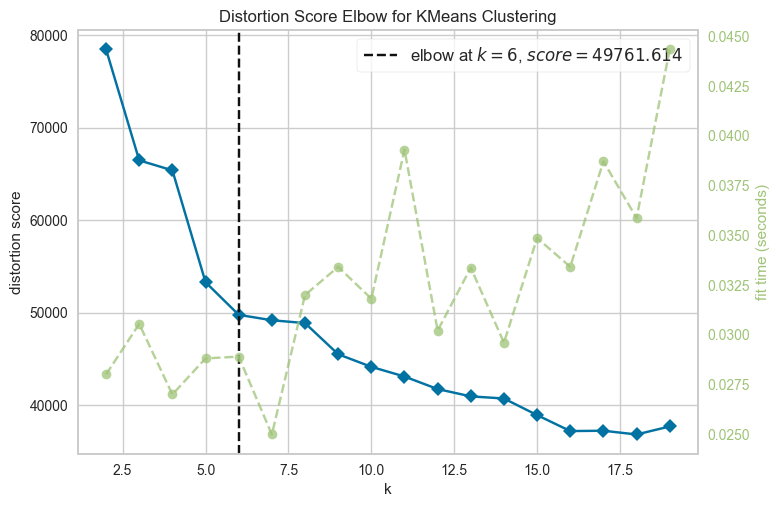

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=19), k=(2, 20))

In [14]:
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(),enc_df,k=(2,20))

Here we see that both of our plots indicate that a value of 7 or 8 clusters is probably ideal here. Let's go with that for now. Also I feel it's important to note that we are not planning on using KMeans clustering for prediction of poisonous versus non-poisonous mushrooms, though that is the eventual goal of this notebook. This is more meant as an exploration of clustering generally and could even be seen as an attempt to predict species or genus of mushrooms. However at this point, we don't have access to that data so we will be running a classifier later in order to eventually predict poisonous versus non-poisonous mushrooms

Now if we want to actually visualize these clusters we'll have to do some PCA so that we can get them on a plot

In [15]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca_df = pca.fit_transform(enc_df)

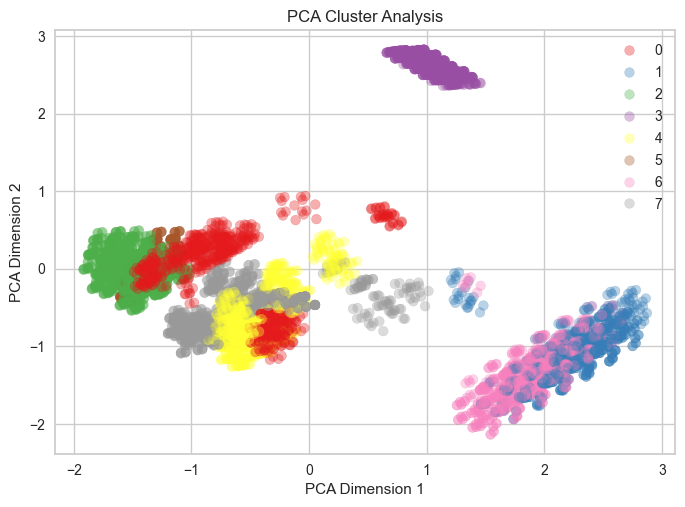

In [16]:
km = KMeans(n_clusters=8)
km.fit(enc_df)

scatter = plt.scatter(pca_df[:,0],
                     pca_df[:,1],
                     c=km.labels_,
                     cmap='Set1',
                     alpha=0.35)
plt.legend(*scatter.legend_elements())
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("PCA Cluster Analysis")
plt.savefig(fname="clusters")

Our data looks to have some clutsers which are more defined than others. Obviously, due to the PCA, we can't see some potentially helpful other dimensions but regardless, We seem to have identified some more general groups if not distinct species. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

We'll use a K Neighbors Classifier for our actual prediction. It will also help to make sure that we are using the right hyperparamters so we'll do a grid search to make sure that our model is as good as it can be.

In [18]:
from sklearn.model_selection import GridSearchCV
hyperparamters = {'n_neighbors': list(range(1,20,4)),
              'weights':['uniform','distance'],
              'p':[1,2],
              'algorithm':['auto','ball_tree','kd_tree'],
              'leaf_size':list(range(20,40,5)),
              }

In [19]:
gs = GridSearchCV(knc,
                 hyperparamters,
                 scoring='neg_mean_absolute_error',
                  n_jobs = -1,
                 )
gs.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [20, 25, 30, 35],
                         'n_neighbors': [1, 5, 9, 13, 17], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')

In [20]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

KNeighborsClassifier(leaf_size=20, n_neighbors=1, p=1)
{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.0


In [21]:
best_clf = gs.best_estimator_

In [22]:
best_clf.score(X_test,y_test)

1.0

In [23]:
y_preds = best_clf.predict(X_test)

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision score: " + str(precision_score(y_test,y_preds)))
print("Recall score: " + str(recall_score(y_test,y_preds)))
print("F1 score: " + str(f1_score(y_test,y_preds)))

Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


It seems like our classifier was able to identify exactly what traits indicate poisonous versus edible mushrooms. At first, this score and the score on the training set were very alarming to me as they indicated perfect performance. However, after doing some research online, I was able to discover that others have also achieved perfect scores with this dataset and that it is not uncommon to see sklearn models perform very well with it.